<a href="https://colab.research.google.com/github/Hyper-Extazzz/Extazzyshka/blob/main/Laboratornue1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow version: 2.12.0
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2995 - accuracy: 0.9144
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1460 - accuracy: 0.9565
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1096 - accuracy: 0.9669
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0891 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0766 - accuracy: 0.9765
313/313 - 1s - loss: 0.0658 - accuracy: 0.9794 - 649ms/epoch - 2ms/step
tf.Tensor(
[[5.9365004e-08 1.3888968e-08 2.1749700e-05 2.2913622e-05 4.8694961e-11
  1.0556426e-07 8.5936266e-13 9.9995208e-01 1.2721632e-07 3.0073850e-06]], shape=(1, 10), dtype=float32)
tf.Tensor(
[[5.0163391e-04 8.2550661e-11 2.2558976e-05 3.9131360e-06 9.9194096e-07
  2.0332471e-04 9.9896145e-01 9.0943617e-09 3.0582448e-04 2.6048852e-07]], shape=(1, 10), dtype=float32)
tf.Tensor(
[[1.36339

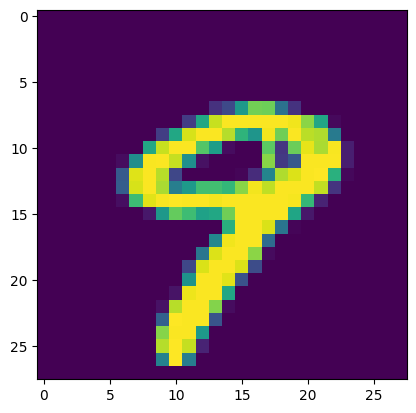

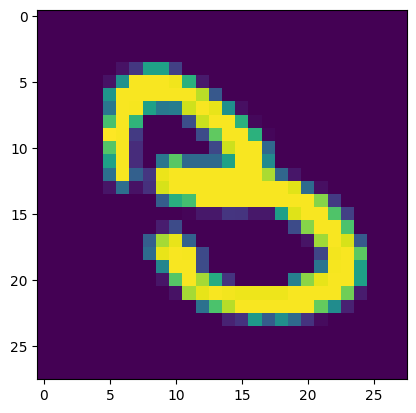

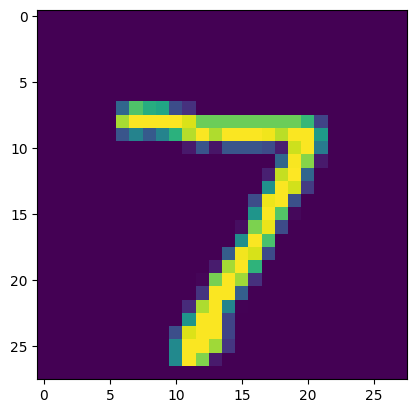

In [22]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(10)
])

predictions = model(x_train[:1]).numpy()
predictions

tf.nn.softmax(predictions).numpy()

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_fn(y_train[:1], predictions).numpy()

model.compile(optimizer='adam',
loss=loss_fn,
metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test, verbose=2)

probability_model = tf.keras.Sequential([
model,
tf.keras.layers.Softmax()
])

probability_model(x_test[:5])

Var0 = probability_model(x_test[0:1])
print(Var0)

Var12 = probability_model(x_test[11:12])
print(Var12)

Var146 = probability_model(x_test[145:146])
print(Var146)


from matplotlib import pyplot as plt
import numpy as np

def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt

gen_image(x_test[9]).show()
gen_image(x_test[18]).show()
gen_image(x_test[0]).show()
